In [47]:
import pandas as pd
import numpy as np
import re, urllib.parse, matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [48]:
df = pd.read_csv("clean_data.csv", low_memory=False)
df.head()

,id,location,Zip,Type,Subtype,Price,Transaction Type,Bedrooms,Living area,Kitchen type,...,Garden surface,Surface of the plot,Number of frontages,Swimming pool,Building condition,Primary energy consumption,CO₂ emission,Kitchen values,Building Cond. values,Energy_classes
0,10578809,liedekerke,1770,house,house,349000,for sale,3.0,180.0,Hyper equipped,...,150.0,256.0,2.0,0.0,As new,241,NaN,3,4,C
1,10578941,sint-andries,8200,house,house,625000,for sale,3.0,185.0,Hyper equipped,...,400.0,539.0,3.0,0.0,As new,292,NaN,3,4,C
2,10577515,seraing,4100,house,house,149000,for sale,2.0,105.0,Semi equipped,...,25.0,105.0,2.0,0.0,Good,469,8321.0,2,3,E
3,10577846,andenne,5300,house,house,335000,for sale,4.0,209.0,Installed,...,NaN,2185.0,4.0,0.0,Good,196,41.0,1,3,B
4,10523130,forest,1190,house,house,545000,for sale,4.0,254.0,USA installed,...,0.0,260.0,2.0,0.0,To be done up,517,135.0,1,2,F


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18030 entries, 0 to 18029
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          18030 non-null  int64  
 1   location                    18030 non-null  object 
 2   Zip                         18030 non-null  int64  
 3   Type                        18030 non-null  object 
 4   Subtype                     18030 non-null  object 
 5   Price                       18030 non-null  int64  
 6   Transaction Type            18030 non-null  object 
 7   Bedrooms                    17699 non-null  float64
 8   Living area                 18030 non-null  float64
 9   Kitchen type                14097 non-null  object 
 10  Furnished                   18030 non-null  float64
 11  How many fireplaces?        18030 non-null  float64
 12  Terrace                     18030 non-null  int64  
 13  Terrace surface             137

In [50]:
house_target = ['Price','Living area','Bedrooms','Furnished','Garden','Terrace','How many fireplaces?','Surface of the plot','Number of frontages','Swimming pool','Building Cond. values','Kitchen values','Primary energy consumption']
apartment_target = ['Price','Living area','Bedrooms','Furnished','How many fireplaces?','Building Cond. values','Kitchen values','Primary energy consumption']

In [51]:
house_target_data = df[df["Type"]=="house"][house_target]
house_target_data.corr(method="spearman")

,Price,Living area,Bedrooms,Furnished,Garden,Terrace,How many fireplaces?,Surface of the plot,Number of frontages,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
Price,1.000000,0.708811,0.526919,0.009590,0.057048,0.140829,0.188644,0.421041,0.303484,0.260953,0.267317,0.190946,-0.332577
Living area,0.708811,1.000000,0.653311,-0.010263,0.011333,0.076107,0.166876,0.419429,0.229320,0.222062,0.138196,0.087594,-0.214579
Bedrooms,0.526919,0.653311,1.000000,0.008830,0.044414,0.065497,0.100298,0.254589,0.130046,0.158345,0.080063,0.061367,-0.141007
Furnished,0.009590,-0.010263,0.008830,1.000000,-0.001870,0.010069,-0.012361,-0.018284,0.002399,0.036687,0.031727,0.026043,-0.016620
Garden,0.057048,0.011333,0.044414,-0.001870,1.000000,0.124474,0.099096,0.161334,0.072593,0.002780,0.043897,0.065031,0.013628
Terrace,0.140829,0.076107,0.065497,0.010069,0.124474,1.000000,0.022148,0.082954,0.083282,0.086341,0.170922,0.195941,-0.096580
How many fireplaces?,0.188644,0.166876,0.100298,-0.012361,0.099096,0.022148,1.000000,0.200504,0.198667,0.077916,0.025335,0.032264,-0.039269
Surface of the plot,0.421041,0.419429,0.254589,-0.018284,0.161334,0.082954,0.200504,1.000000,0.722604,0.253196,0.033731,0.039304,0.038587
Number of frontages,0.303484,0.229320,0.130046,0.002399,0.072593,0.083282,0.198667,0.722604,1.000000,0.215351,0.068958,0.064878,0.041344
Swimming pool,0.260953,0.222062,0.158345,0.036687,0.002780,0.086341,0.077916,0.253196,0.215351,1.000000,0.133699,0.114586,-0.104210


In [52]:
house_target_data.describe()

,Price,Living area,Bedrooms,Furnished,Garden,Terrace,How many fireplaces?,Surface of the plot,Number of frontages,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
count,9.539000e+03,9539.000000,9474.000000,9539.000000,9539.000000,9539.000000,9539.000000,9045.000000,8356.000000,9539.000000,9539.000000,9539.000000,9539.000000
mean,5.539761e+05,255.255268,3.798501,0.018555,0.582975,0.689276,0.093825,1408.466777,2.991503,0.049481,2.358318,1.076738,374.147919
std,6.650943e+05,1811.083053,1.716173,0.134956,0.493093,0.462814,0.329418,8067.571846,0.873055,0.216882,1.496108,1.347934,1496.913984
min,1.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,2.590000e+05,145.000000,3.000000,0.000000,0.000000,0.000000,0.000000,209.000000,2.000000,0.000000,2.000000,0.000000,189.000000
50%,3.860000e+05,190.000000,3.000000,0.000000,1.000000,1.000000,0.000000,463.000000,3.000000,0.000000,3.000000,1.000000,301.000000
75%,5.950000e+05,268.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1000.000000,4.000000,0.000000,3.000000,2.000000,443.000000
max,1.100000e+07,175173.000000,30.000000,1.000000,1.000000,1.000000,10.000000,500000.000000,10.000000,1.000000,4.000000,3.000000,83408.000000


<Axes: >

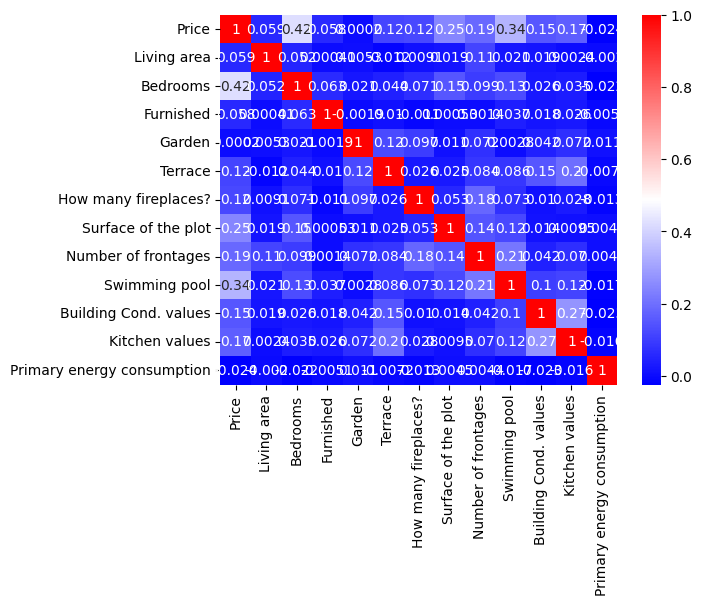

In [53]:
plt.figure()
sns.heatmap(house_target_data.corr(), cmap="bwr", annot=True)

<Figure size 4000x3000 with 0 Axes>

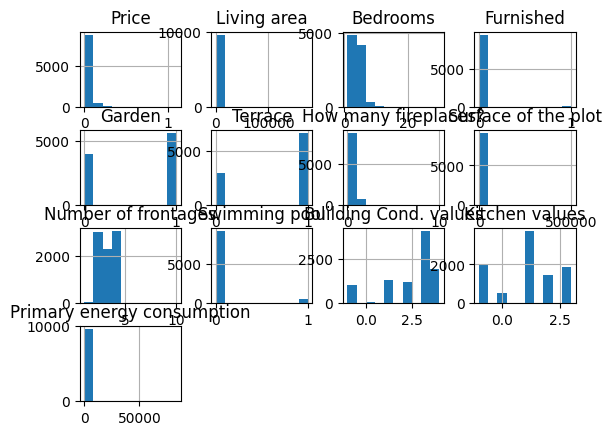

In [54]:
plt.figure(figsize=(40,30))
house_target_data.hist()
plt.show()

In [55]:
Type = df["Type"].unique()

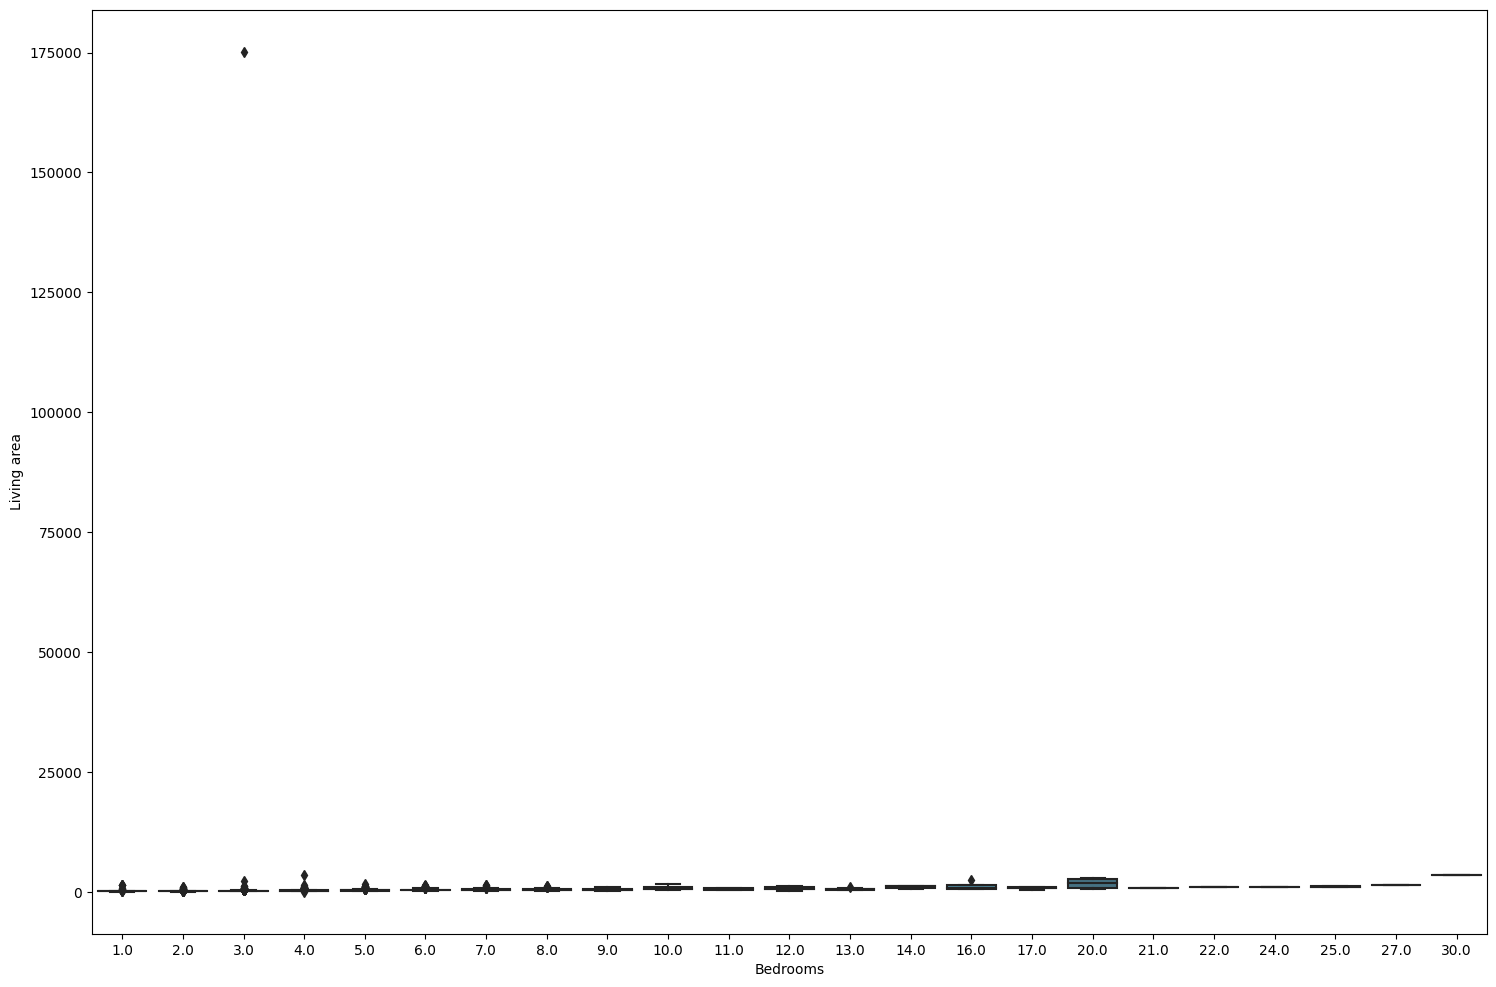

In [57]:
plt.figure (figsize= (18,12))
sns.boxplot(x=house_target_data["Bedrooms"], y= house_target_data["Living area"], palette= "GnBu_d")

plt.show()

In [63]:
house_target_data["Bedrooms"].value_counts()

Bedrooms
3.0     3508
4.0     2416
5.0     1256
2.0     1184
6.0      504
7.0      203
1.0      159
8.0       97
10.0      41
9.0       36
12.0      25
13.0       9
11.0       8
16.0       6
14.0       5
17.0       5
20.0       4
25.0       2
27.0       2
21.0       1
24.0       1
22.0       1
30.0       1
Name: count, dtype: int64

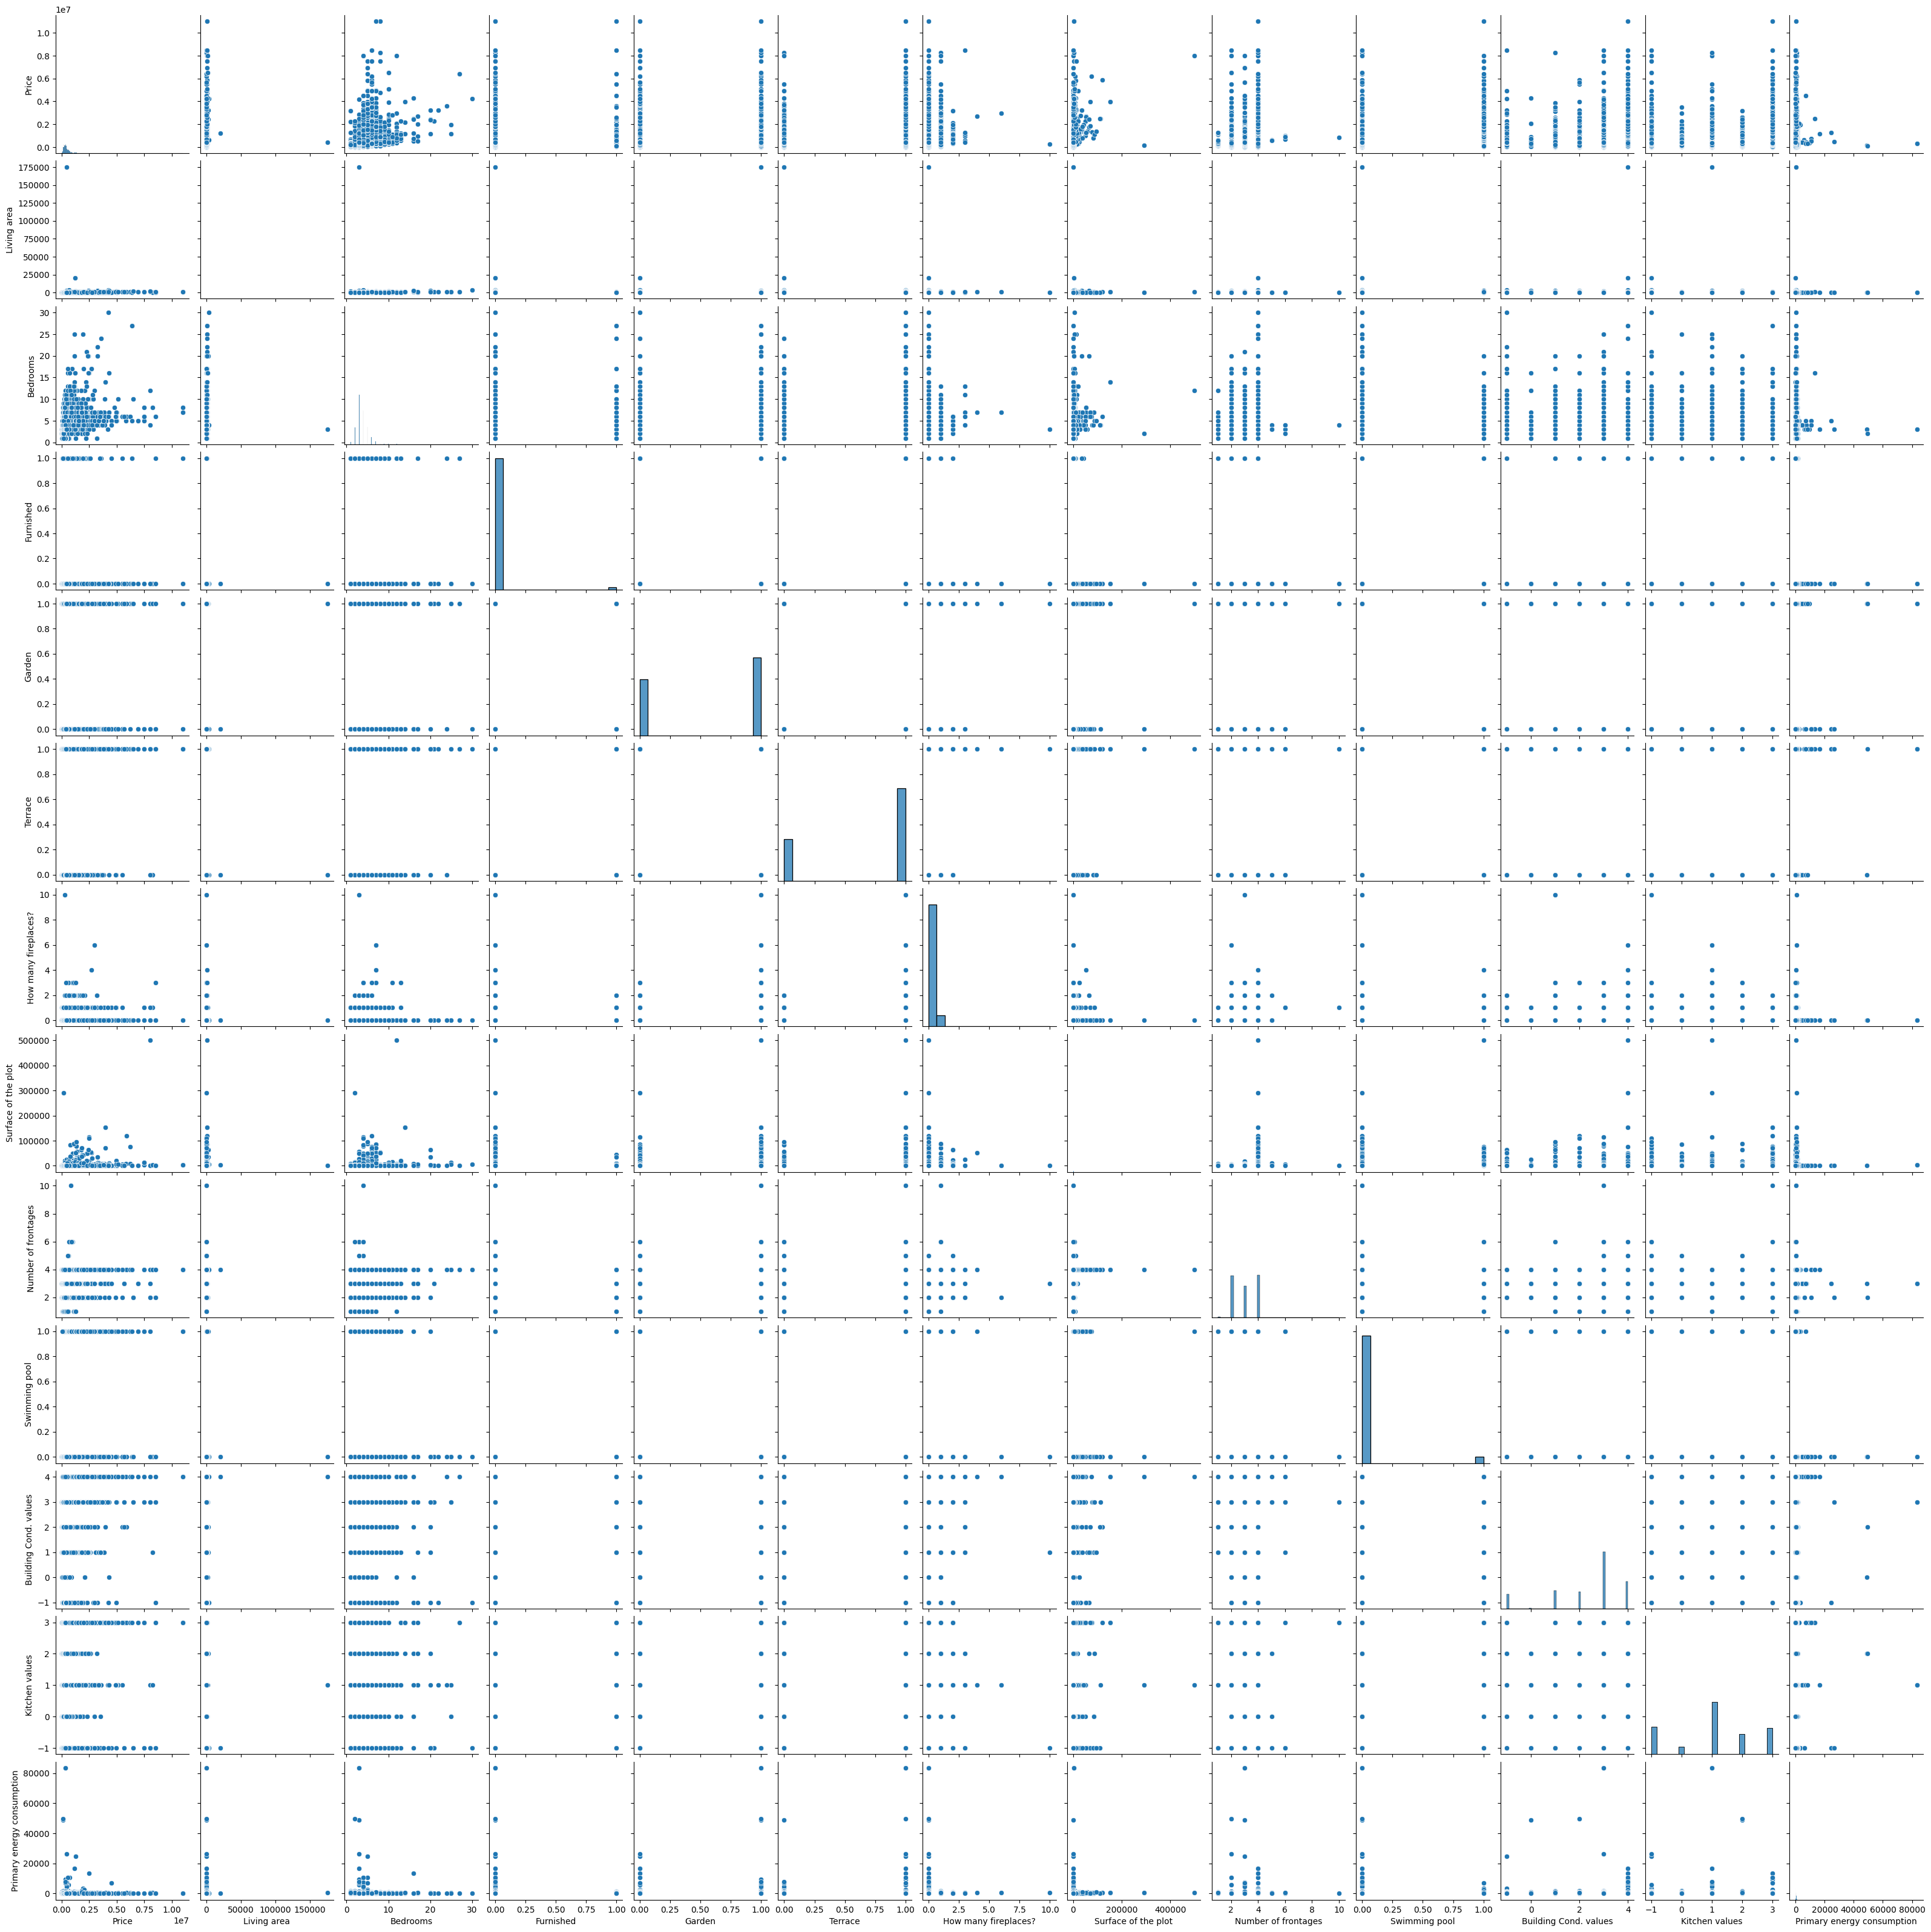

In [61]:
sns.pairplot(house_target_data)

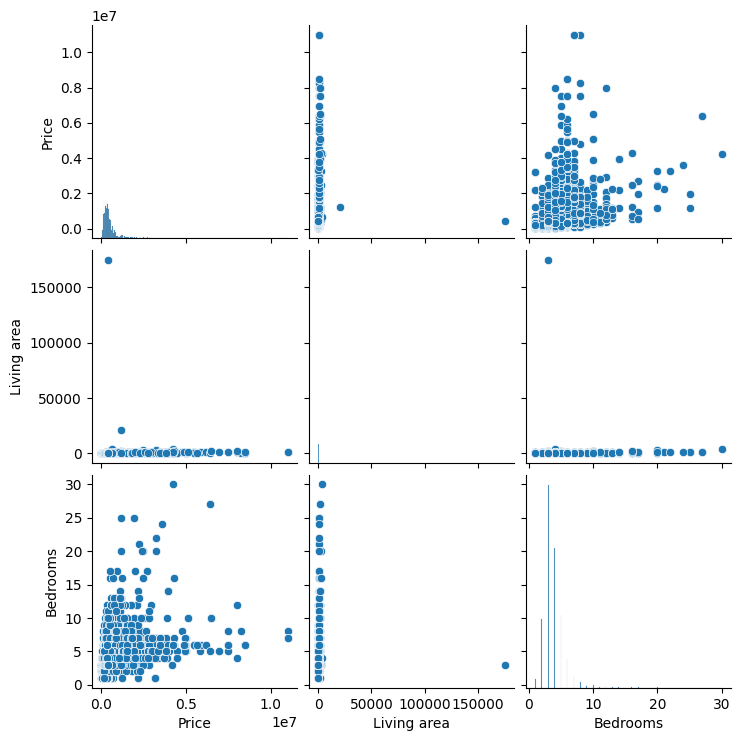

In [64]:
sns.pairplot(house_target_data[["Price","Living area","Bedrooms"]])

<Axes: ylabel='count'>

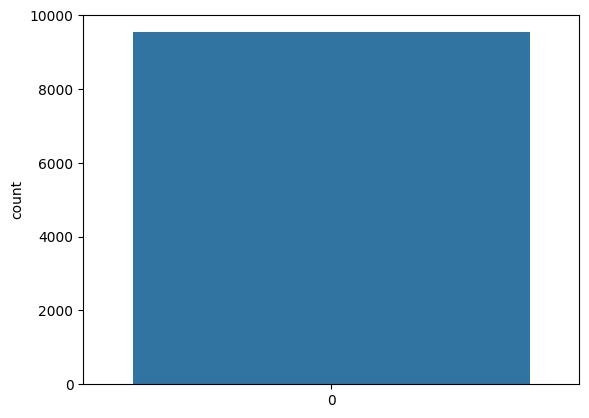

In [69]:
sns.countplot(house_target_data["Bedrooms"])

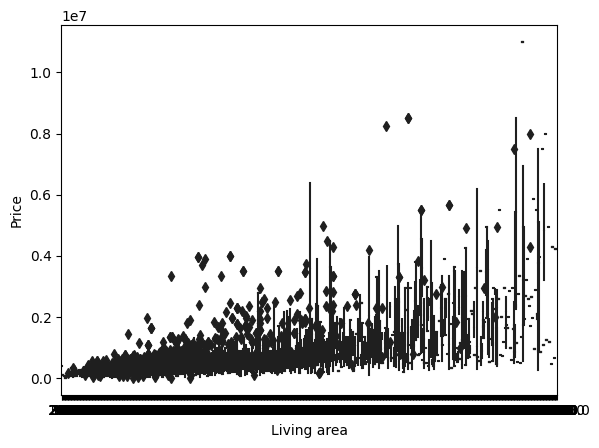

In [71]:
sns.boxplot(x=house_target_data["Living area"], y=house_target_data["Price"] , palette= "GnBu_d")
plt.show()